Complete the exercises below For **Assignment #11**.

For this assignment we'll use the [California Housing Data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

This data is available in the [Scikit-Learn](https://scikit-learn.org/stable/index.html) Python module.

To retrieve the data,
1. open a new Python notebook with the `data730` kernel, and,
2. run the following code.

```python
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

(
    california_housing.data
    .assign(MedianHouseValue=california_housing.target)
    .to_csv('california-housing.csv', index=False)
)
```

This will produce a new file called `california-housing.csv` that we'll import in this notebook.

Back in the Python notebook, you can use the following snippet to get a description of the dataset.

```python
print(california_housing.DESCR)
```


Load the `tidymodels` package.

In [1]:
library('tidymodels')


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.1     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



Run the following cell to read in our data.

In [2]:
housing = readr::read_csv('california-housing.csv', col_types = readr::cols())

housing |> head()

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3252,41,6.984127,1.0238095,322,2.555556,37.88,-122.23,4.526
8.3014,21,6.238137,0.9718805,2401,2.109842,37.86,-122.22,3.585
7.2574,52,8.288136,1.0734463,496,2.802260,37.85,-122.24,3.521
5.6431,52,5.817352,1.0730594,558,2.547945,37.85,-122.25,3.413
3.8462,52,6.281853,1.0810811,565,2.181467,37.85,-122.25,3.422
4.0368,52,4.761658,1.1036269,413,2.139896,37.85,-122.25,2.697


Let's build a random forest model to predict `MedianHouseValue`.

1. Create your model, set the engine to `ranger` with `importance = 'impurity'` and the mode as `regression`.
2. Fit the model using `MedianHouseValue` as the response variable and all other columns as predictors.

In [17]:
mod <- rand_forest() |> 
        set_engine('ranger', importance = 'impurity') |>
        set_mode('regression')

rec <- recipe(MedianHouseValue ~., data = housing)

In [18]:
wf <- workflow() |>
    add_recipe(rec) |>
    add_model(mod)

wf_fit <- fit(wf, data = housing)

In [22]:
outcomes <- augment(wf_fit, new_data = housing)

outcomes |> head(10)

.pred,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.340744,8.3252,41,6.984127,1.0238095,322,2.555556,37.88,-122.23,4.526
3.787105,8.3014,21,6.238137,0.9718805,2401,2.109842,37.86,-122.22,3.585
3.859154,7.2574,52,8.288136,1.0734463,496,2.802260,37.85,-122.24,3.521
3.469724,5.6431,52,5.817352,1.0730594,558,2.547945,37.85,-122.25,3.413
2.997157,3.8462,52,6.281853,1.0810811,565,2.181467,37.85,-122.25,3.422
2.629592,4.0368,52,4.761658,1.1036269,413,2.139896,37.85,-122.25,2.697
2.784700,3.6591,52,4.931907,0.9513619,1094,2.128405,37.84,-122.25,2.992
2.424664,3.1200,52,4.797527,1.0618238,1157,1.788253,37.84,-122.25,2.414
2.052522,2.0804,42,4.294118,1.1176471,1206,2.026891,37.84,-122.26,2.267


❓ What is the OOB error for this model?

**Answer:**

In [23]:
rand_for <- wf_fit |> extract_fit_engine()
oob_mse  <- rand_for$prediction.error # mean squared error OOB

oob_mse

[1] 0.2338221

Plot the feature importances using the `vip` package. Remember that you can use the `extract_fit_engine` function to get the `ranger` model object to send to the `vip` function.


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




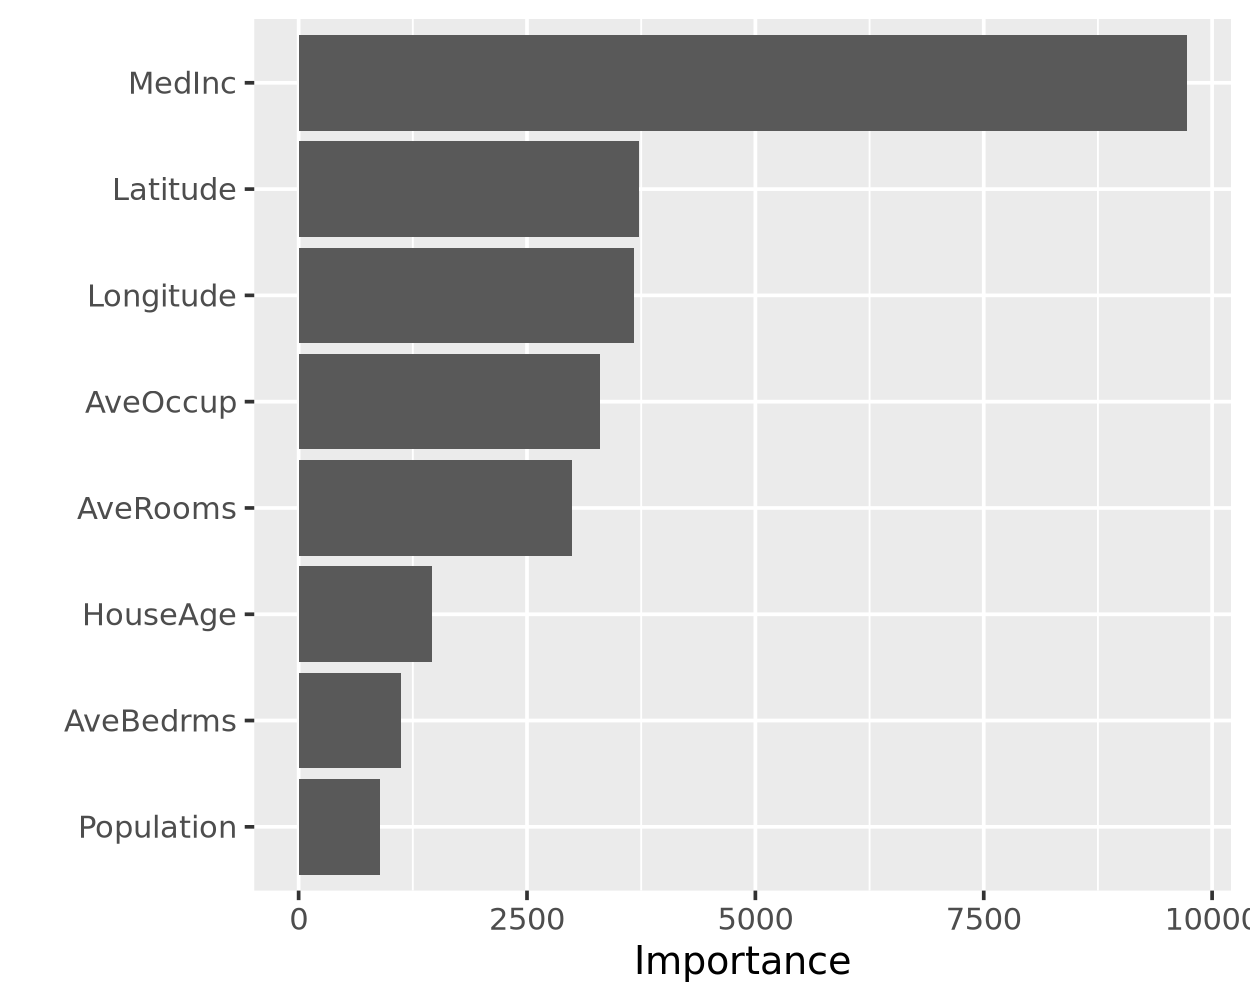

In [25]:
library('vip')

wf_fit |>
    extract_fit_parsnip() |>
    vip()


It looks like `Latitude` and `Longitude` are important for predicting home value. Let's explore those variables.

Install the `mapdata` package into your `data730` environment.

1. Open a Terminal, and,
2. Run the following command:

```bash
conda install -c conda-forge -n data730 r-mapdata
```

Load the `mapdata` package.

In [26]:
library('mapdata')

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




The following code will generate a map of California. Adapt this code to plot `Latitude` and `Longitude` from the `housing` dataset, color points by the `MedianHouseValue`. [Here is an example for reference](https://raw.githubusercontent.com/UNC-DATA-730/a10/main/example.png).


```r
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()
```

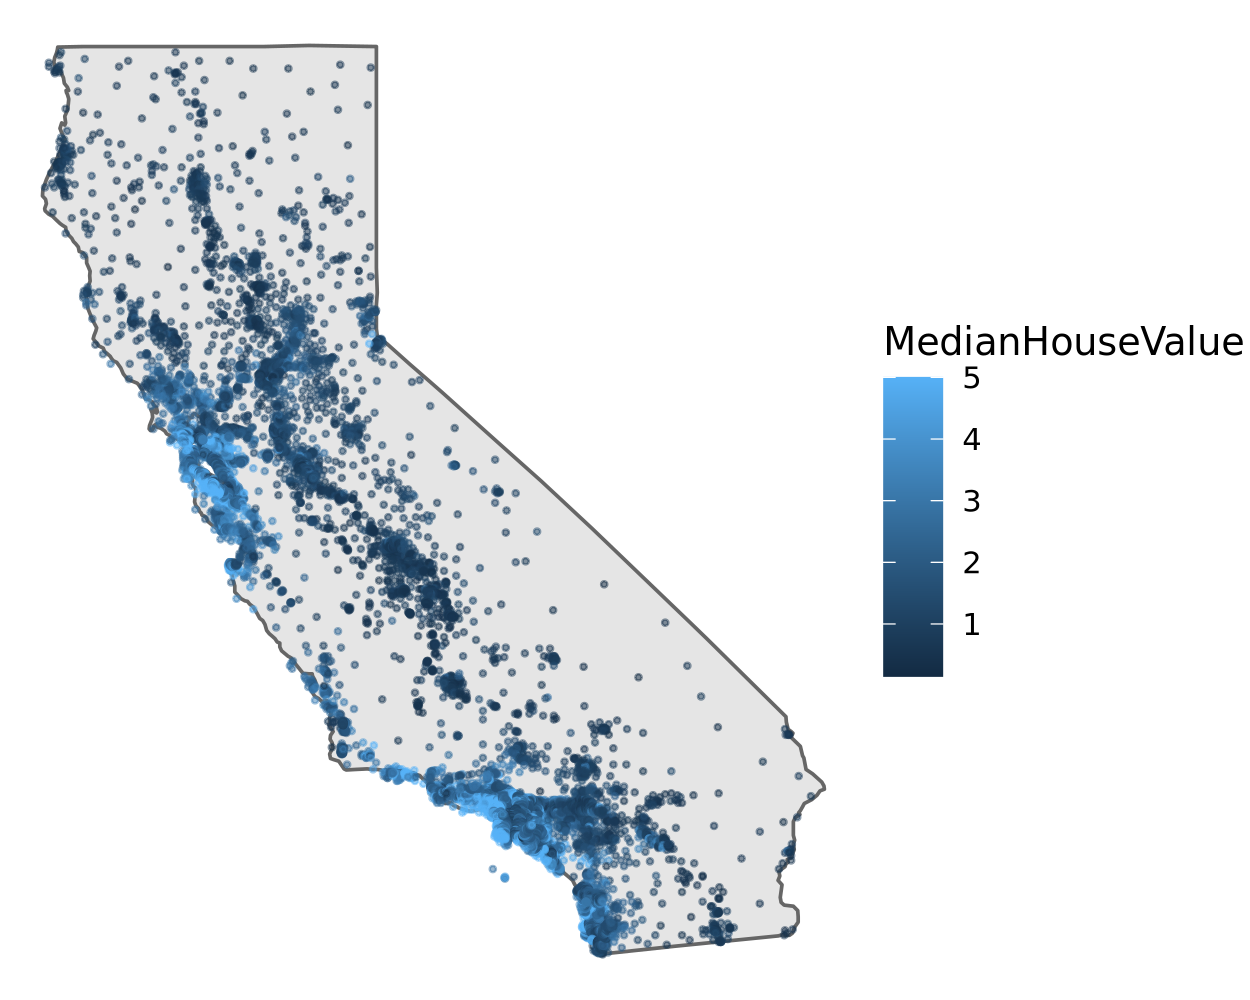

In [30]:
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +

    geom_point(data = housing, aes(x = Longitude, y= Latitude, color = MedianHouseValue), 
                alpha = 0.5, size = 0.5) +

    coord_quickmap() +
    theme_void() 
